## Linear Oscillator
### Olivier Pauluis
This Botebook investigates the solution to the linear oscillator ODE

In [1]:
# Import required libraries
import numpy as np
import scipy
import matplotlib.pyplot as plt
from IPython.display import display, HTML

We consider the ODE
$$ \ddot y + \alpha \dot y + \omega_0^2 y = F \cos \omega t. $$
Here, $\omega_0$ is the angular speed [^1] of the undamped oscillator, $\alpha$ is the damping coefficient, $F$ is the forcing amplitude, and $\omega is the angular speed of the forcing.

We will explore solutions of this ODE for different choices of the parameters. 

[^1] The *angular speed* $\omega$ is the rate of change of the angle. It is related to - but distinct from - the *frequency* $\nu$, defined as the number of oscillation per unit of time, with $\omega = 2 \pi \nu$. 

## Numerical solution using `scipy.integrate.odeint`
`Numpy` comes with a build-in numerical OCE olver call `odeint`. As with any python routines, you can get more information by entering 

    help(scipy.integrate.odeint)

The code is set-up to solve a first order vector ode. We thus first recast the second order ODE as two first order ODE:
$$ \dot y_1 = y_2$$
$$ \dot y_2 = - \alpha y_2 - \omega_0^2 y_1 + F \cos \omega t.$$


In [2]:
def linear_oscillator(y,t,alpha = 0, omega0=1, F =0, omegaF = 1):
    dydt = np.zeros_like(y)
    dydt[0] = y[1]
    dydt[1] = - alpha * y[1] - omega0**2 * y[0] + F * np.cos(omegaF*t)
    return dydt
    

## Unforced oscillator
We can look at the behavior of the ODE in the absence of forcing ($F = 0$). For an undamped oscillator ($\alpha =0$), we get peridioic oscillation with angular speed $\omega 0$.

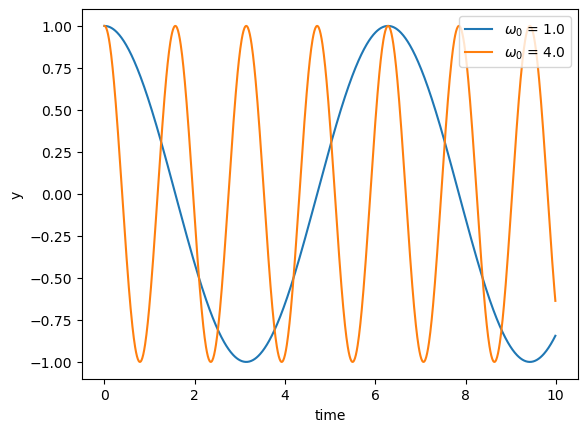

In [3]:
time = np.arange(0,10,0.01)
y0 = np.array((0.0,1.0))
y1 = scipy.integrate.odeint(linear_oscillator, y0, time,
                           args = (0, 1.0, 0, 1.0))
y2 = scipy.integrate.odeint(linear_oscillator, y0, time,
                           args = (0, 4.0, 0, 1.0))
plt.figure()
plt.plot(time,y1[:,1],label = '$\omega_0$ = 1.0')
plt.plot(time,y2[:,1],label = '$\omega_0$ = 4.0')
plt.legend(loc = 'upper right')
plt.xlabel('time')
plt.ylabel('y')
plt.show()

### Damping
When damping is included, the oscillation starts to decays over time. As the damping gets stronger, the angular spedd of the oscialltion is also reduces, and for a strong enough damping, we only get exponantial decay (Think of a pendulum in honey...).

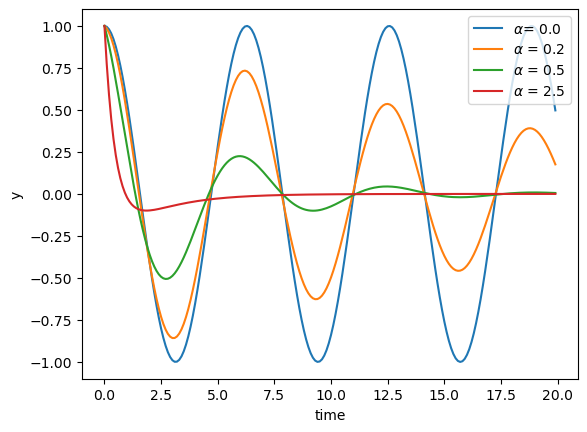

In [4]:
time = np.arange(0,20,0.1)
y0 = np.array((0.0,1.0))
y1 = scipy.integrate.odeint(linear_oscillator, y0, time,
                           args = (0, 1.0, 0, 1.0))
y2 = scipy.integrate.odeint(linear_oscillator, y0, time,
                           args = (0.1, 1.0, 0, 1.0))
y3 = scipy.integrate.odeint(linear_oscillator, y0, time,
                           args = (0.5, 1.0, 0, 1.0))
y4 = scipy.integrate.odeint(linear_oscillator, y0, time,
                           args = (2.5, 1.0, 0, 1.0))
plt.figure()
plt.plot(time,y1[:,1],label = r'$\alpha$= 0.0')
plt.plot(time,y2[:,1],label = r'$\alpha$ = 0.2')
plt.plot(time,y3[:,1],label = r'$\alpha$ = 0.5')
plt.plot(time,y4[:,1],label = r'$\alpha$ = 2.5')

plt.legend(loc = 'upper right')
plt.xlabel('time')
plt.ylabel('y')
plt.show()

### Forced damped oscillator
When both damping and forcing are included, all solutions will converge toward a solution that oscillates at the same frequency as the forcing, which coincides with the solution obtained using the method pf *judicious guessing*.


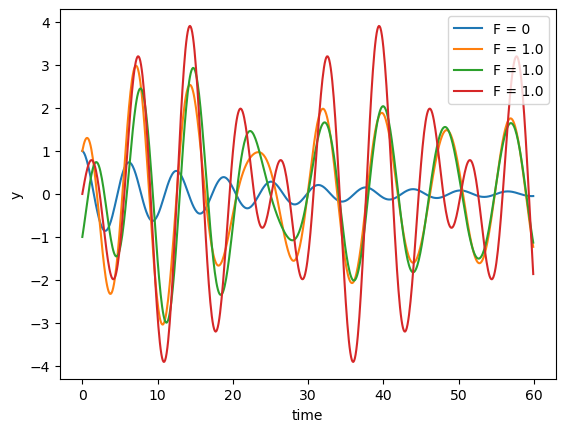

In [6]:
time = np.arange(0,60,0.1)
y0 = np.array((0.0,1.0))
y1 = scipy.integrate.odeint(linear_oscillator, y0, time,
                           args = (0.1, 1.0, 0.0, 0.75))
y2 = scipy.integrate.odeint(linear_oscillator, y0, time,
                           args = (0.1, 1.0, 1.0, 0.75))
y3 = scipy.integrate.odeint(linear_oscillator, -y0, time,
                           args = (0.1, 1.0, 1.0, 0.75))
y4 = scipy.integrate.odeint(linear_oscillator, 0*y0, time,
                           args = (0.0, 1.0, 1.0, 0.75))

plt.figure()
plt.plot(time,y1[:,1],label='F = 0')
plt.plot(time,y2[:,1],label='F = 1.0')
plt.plot(time,y3[:,1],label='F = 1.0')
plt.plot(time,y4[:,1],label='F = 1.0')


plt.legend(loc = 'upper right')
plt.xlabel('time')
plt.ylabel('y')
plt.show()

The ampitude of the response depends not only on the strength of the forcing, but also on how close is the focing's frequency to the intrinsic frequency of the oscillator and to the damping coefficient. 

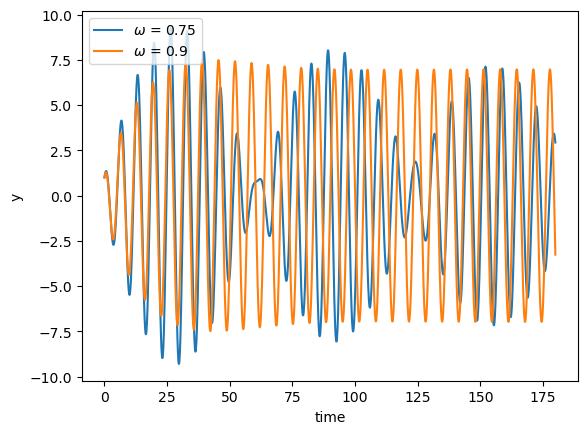

In [13]:
time = np.arange(0,180,0.1) #(y,t,alpha = 0, omega0=1, F =0, omegaF = 1)
y0 = np.array((0.0,1.0))
y1 = scipy.integrate.odeint(linear_oscillator, y0, time,
                           args = (0.01, 1.0, 1.0, 0.9))
y2 = scipy.integrate.odeint(linear_oscillator, y0, time,
                           args = (0.1, 1.0, 1.0, 0.95))
y3 = scipy.integrate.odeint(linear_oscillator, y0, time,
                           args = (0.1, 1.0, 1.0, 1.0))
y4 = scipy.integrate.odeint(linear_oscillator, y0, time,
                           args = (0.1, 1.0, 1.0, 1.15))

plt.figure()
plt.plot(time,y1[:,1],label='$\omega$ = 0.75')
plt.plot(time,y2[:,1],label='$\omega$ = 0.9')
# plt.plot(time,y3[:,1],label='$\omega$ = 1.0')
# plt.plot(time,y4[:,1],label='$\omega$ = 1.15')


plt.legend(loc = 'upper left')
plt.xlabel('time')
plt.ylabel('y')
plt.show()

# change alpha to zero and redo above!

# Resonance
The response of the damped oscillator to forcing is an example of resonance - the amplitude of the response is strongly affected by how close the frequency of the forcing is that to the intrinsic frequency of the oscillator. As damping increases, the response of the oscillator gets both weaker and less selective (i.e. less dependent on the forcing frequency). You can derive the response of the damped oscillator to the forcing (see section 2.6 in the textbook) to show that the amplitude of the response $(y(t))$ to the forcing is given by:  
$$ A = \left( (\omega^2 - \omega_0^2)^2 + \alpha^2 \omega^2\right)^{-1/2}$$

In [30]:
def damped_oscillator_response(omega0,alpha,omega):
    response = 1/np.sqrt((omega**2 - omega0**2)**2 + (alpha * omega)**2)
    return response

/tmp/ipykernel_1164932/3895861048.py:2: RuntimeWarning: divide by zero encountered in divide
  response = 1/np.sqrt((omega**2 - omega0**2)**2 + (alpha * omega)**2)


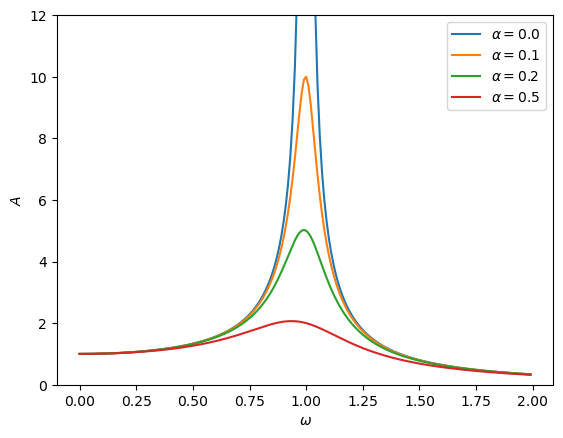

In [34]:
omega = np.arange(0,2,0.01)
plt.figure()
plt.plot(omega,damped_oscillator_response(1.0,0.0,omega)\
         ,label = r'$\alpha = 0.0$')
plt.plot(omega,damped_oscillator_response(1.0,0.1,omega)\
         ,label = r'$\alpha = 0.1$')
plt.plot(omega,damped_oscillator_response(1.0,0.2,omega)\
        ,label = r'$\alpha = 0.2$')
plt.plot(omega,damped_oscillator_response(1.0,0.5,omega)\
        ,label = r'$\alpha = 0.5$')
plt.ylim(0,12.0)
plt.xlabel(r'$\omega$')
plt.ylabel(r'$A$')
plt.legend()
plt.show()


You may notice that in the absence of dissipation ($\alpha = 0$), the previous expression would yield an infinite amplitude when the frequency of the forcing matches that of the oscillator ($\omega = \omega_0$).

To explain what is going on, you can  check the solution of the ODE  
$$ \ddot y + \omega_0^2 y = \cos \omega_0 t $$\
using the method of judicious guessing. As $\cos \omega_0 t$ is also a solution of the homogenous problem, a *judicious* guess should be a function of the form 
$$ y(t) = (At + B) \cos (\omega_0 t) + (Ct +D) \sin(\omega_0 t)$$
whose amplitude can grow linearly over time. 

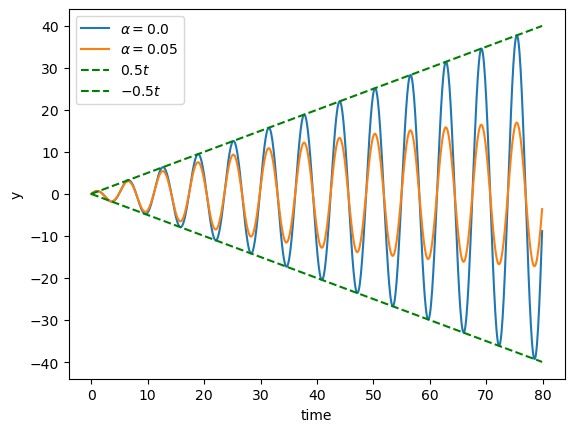

In [36]:
time = np.arange(0,80,0.1)
y0 = np.array((0.0,0.0))
y1 = scipy.integrate.odeint(linear_oscillator, y0, time,
                           args = (0.0, 1.0, 1.0, 1.0))
y2 = scipy.integrate.odeint(linear_oscillator, y0, time,
                           args = (0.05, 1.0, 1.0, 1.0))
plt.figure()
plt.plot(time,y1[:,1],label=r'$\alpha = 0.0$')
plt.plot(time,y2[:,1],label=r'$\alpha = 0.05$')
plt.plot(time,0.5 * time, 'g--',label=r'$0.5 t$')
plt.plot(time,-0.5 * time,'g--',label=r'$-0.5 t$')



plt.legend(loc = 'upper left')
plt.xlabel('time')
plt.ylabel('y')
plt.show()